<a href="https://colab.research.google.com/github/ThushanDodanwela/Clustering--Divisive/blob/master/Divisive_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Divisive Clustering**


*   Divisive Clustering also kknown as 'Top-Down' Clustering
*   This is an 'Unsupervised' learning algoritham.
*   In Divisive Clustering, what we do is spliting the cluster that contains the whole data and proceeds by splitting clusters recursively until individual data have been split into a single item. 












*   First create a data dictionary inclusing Student Id, Height, Weight and Gender. 
*   Dictionary name can be used as 'std_Dict'




In [1]:
std_Dict={'id':['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035'], 
          'height':[187.5,175.70,188.23,156.95,159.64,157.20,142.76,141.74,132.97,146.96,148.43,182.19,177.49,170.82,183.94,162.49,159.63,165.68,160.95,148.12,150.17,158.52,163.89,156.80,158.20,157.90,161.17,180.83,164.50,175.87,171.87,157.54,145.46,150.24,152.93],
          'weight':[73.62,96.48,99.79,93.58,69.03,83.41,76.17,79.78,70.92,84.62,96.93,75.79,85.91,84.55,78.08,88.90,78.40,84.34,44.08,59.42,58.12,58.85,51.11,52.14,64.86,50.64,57.23,45.54,48.17,48.59,42.51,56.02,55.67,54.98,41.34],
          }

print(std_Dict)

{'id': ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035'], 'height': [187.5, 175.7, 188.23, 156.95, 159.64, 157.2, 142.76, 141.74, 132.97, 146.96, 148.43, 182.19, 177.49, 170.82, 183.94, 162.49, 159.63, 165.68, 160.95, 148.12, 150.17, 158.52, 163.89, 156.8, 158.2, 157.9, 161.17, 180.83, 164.5, 175.87, 171.87, 157.54, 145.46, 150.24, 152.93], 'weight': [73.62, 96.48, 99.79, 93.58, 69.03, 83.41, 76.17, 79.78, 70.92, 84.62, 96.93, 75.79, 85.91, 84.55, 78.08, 88.9, 78.4, 84.34, 44.08, 59.42, 58.12, 58.85, 51.11, 52.14, 64.86, 50.64, 57.23, 45.54, 48.17, 48.59, 42.51, 56.02, 55.67, 54.98, 41.34]}


Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




Creating a Table from the Std-Dict Dictinary using Pandas library

In [3]:
data_values = pd.DataFrame.from_dict(std_Dict).set_index('id')
data_values

,height,weight
id,,
001,187.50,73.62
002,175.70,96.48
003,188.23,99.79
004,156.95,93.58
005,159.64,69.03
006,157.20,83.41
007,142.76,76.17
008,141.74,79.78
009,132.97,70.92


**Drawing a Scaterrplot using Seaborn Library**

After ploting the scatterplot, we can closely see there are 02 different Groups of Data are available. Our Data set can be clustterd based on the weight and height. 

*This will Emphasise that Height and Weight can be taken into the eqaution*

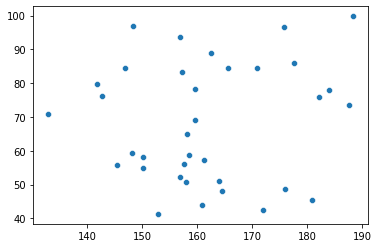

In [4]:
sns.scatterplot(x=std_Dict['height'], y=std_Dict['weight'])

**Displying the data in a dendrogram**

*A dendrogram is a diagram that shows the hierarchical relationship between objects*

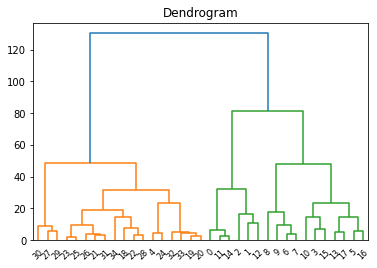

In [5]:
import scipy.cluster.hierarchy as sc

values = {'Height_Val':std_Dict['height'],'Weight_Val':std_Dict['weight']}
data = pd.DataFrame(values)
data

# Plot the hierarchical clustering as a dendrogram.

dendrogram = sc.dendrogram(sc.linkage(data, method='ward'))

plt.title('Dendrogram')
plt.show()





**Ward linkage:** Also known as MISSQ (Minimal Increase of Sum-of-Squares). It specifies the distance between two clusters, computes the sum of squares error, and successively chooses the next clusters based on the smaller ESS. 

Ward's method will reduce the Error. 




# **Plot the Dendogram with threshhold points**

**How to find the value for the vertical line?**

Finding an interesting number of clusters in a dendrogram is the same as finding the largest horizontal space that doesn't have any vertical lines (the space with the longest vertical lines). This means that there's more separation between the clusters.

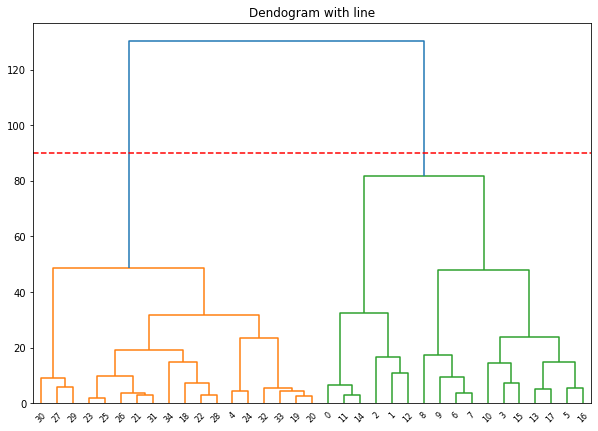

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram with line")
clusters = sc.linkage(data, 
            method='ward', 
            metric="euclidean")
sc.dendrogram(clusters)
plt.axhline(y = 90, color = 'r', linestyle = '--')






After locating the horizontal line, we count how many times our vertical lines were crossed by it - In this data set, 2 times.

Therefore, The whole Cluster can be dividied into 02 parts.


1.   [34,18,30,27,28,29,21,19,20,26,31,25,22,23,32,33]
2.   [13,17,12,15,6,16,8,14,1,10,2,3,5,9,4,7,0,11]




In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

From the above array you can clearly see there are 02 clusters availble. 

***Note:**

The dendrogram should be considered only as a reference when used to choose the number of clusters. It can easily get that number way off and is completely influenced by the type of linkage and distance metrics

Text(0.5, 1.0, 'Scatter Plot')

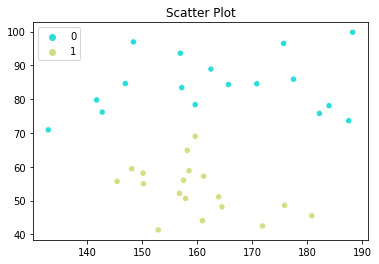

In [15]:
data_labels_pca = cluster.labels_

sns.scatterplot(x=std_Dict['height'], 
                y=std_Dict['weight'],
                hue=data_labels_pca,
                palette="rainbow").set_title('Scatter Plot')


**Let's Divided the above two clusters into another sub clusters.**



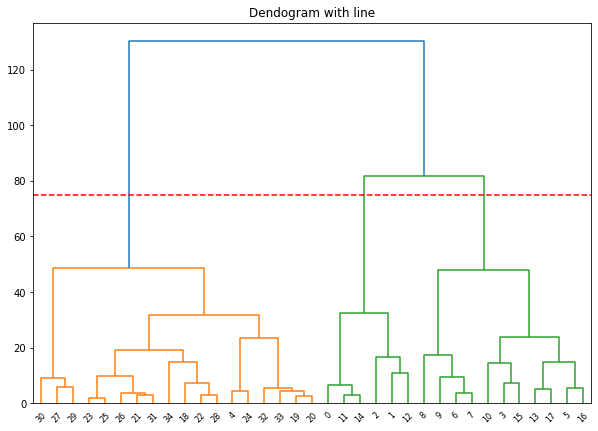

In [12]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram with line")
clusters = sc.linkage(data, 
            method='ward', 
            metric="euclidean")
sc.dendrogram(clusters)
plt.axhline(y = 75, color = 'r', linestyle = '--')

After locating the horizontal line, we count how many times our vertical lines were crossed by it - In this data set, 3 times.

Therefore, The whole Cluster can be dividied into 03 parts.

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The above array shows how data points are clustered into 03 groups. 







Likewise we can divide the whole cluster into single element clusters by using the divisive clusterring algoritham.  